In [129]:
from pathlib import Path  
from matplotlib import pyplot as plot
from pathlib import Path  
import pandas as pandas
import numpy as numpy
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [130]:
dataframe = pandas.read_csv("dataset.csv").dropna()
feature_names = ["Appliances","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint"]
dataframe = dataframe[feature_names]

X = dataframe.drop("Appliances", axis = 1)
y = dataframe["Appliances"]
TEST_SIZE_RATIO = (1 / 3)
RANDOM_STATE_SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE_RATIO, random_state=RANDOM_STATE_SEED)

In [131]:
GBR_GRAPH_METRICS_DATASET_PATH = Path("./GBR_graph_metrics_dataset.csv")
if not(GBR_GRAPH_METRICS_DATASET_PATH.exists() and GBR_GRAPH_METRICS_DATASET_PATH.is_file()):
    performance = {}
    N_ESTIMATORS = 10000
    for max_depth_iterator in [1, 2, 3]:
        print("max_depth: %d" %max_depth_iterator)
        performance[max_depth_iterator] = [0] * N_ESTIMATORS
        gradient_boosting_regressor = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = N_ESTIMATORS, max_depth = max_depth_iterator, verbose = 1)
        gradient_boosting_regressor.fit(X_train, y_train)
        for ilteration, y_pred in enumerate(gradient_boosting_regressor.staged_predict(X)):
            performance[max_depth_iterator][ilteration] = gradient_boosting_regressor.loss_(y, y_pred)

    csv_string = "\"max_depth\",\"iteration\",\"training_loss\""
    for depth in performance.keys():
        for iteration in numpy.arange(len(performance[depth])):
            csv_string = csv_string + "\n" + str(depth) + "," + str(iteration) + "," + str(performance[depth][iteration])
    gradient_boosted_graph_metrics_dataset = open(GBR_GRAPH_METRICS_DATASET_PATH.name, "w")
    gradient_boosted_graph_metrics_dataset.write(csv_string)
    gradient_boosted_graph_metrics_dataset.close()

max_depth: 1
      Iter       Train Loss   Remaining Time 
         1       10489.5386            2.14m
         2       10450.7376            2.12m
         3       10419.3088            2.11m
         4       10391.1226            2.11m
         5       10365.7311            2.11m
         6       10344.3734            2.10m
         7       10323.5500            2.10m
         8       10304.3883            2.10m
         9       10286.5598            2.10m
        10       10269.6979            2.10m
        20       10133.3963            2.09m
        30       10037.7359            2.08m
        40        9959.4346            2.07m
        50        9891.3821            2.07m
        60        9830.9951            2.08m
        70        9775.0576            2.11m
        80        9723.6733            2.10m
        90        9675.5107            2.09m
       100        9631.0072            2.09m
       200        9292.3991            2.02m
       300        9063.8431            1.

/Users/pru/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


max_depth: 2
      Iter       Train Loss   Remaining Time 
         1       10455.8118            4.06m
         2       10388.4873            4.16m
         3       10325.5813            4.20m
         4       10273.1993            4.18m
         5       10211.2256            4.19m
         6       10165.2152            4.19m
         7       10125.5981            4.19m
         8       10087.9786            4.19m
         9       10042.8762            4.19m
        10       10007.2427            4.19m
        20        9685.3691            4.55m
        30        9451.5161            4.46m
        40        9214.6167            4.36m
        50        9024.9122            4.30m
        60        8840.4425            4.25m
        70        8664.4662            4.20m
        80        8508.1589            4.22m
        90        8366.9174            4.44m
       100        8249.3157            4.40m
       200        7498.2697            4.13m
       300        6964.0439            3.

/Users/pru/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


max_depth: 3
      Iter       Train Loss   Remaining Time 
         1       10413.6652            6.02m
         2       10276.6920            6.12m
         3       10145.5788            6.16m
         4       10018.7340            6.12m
         5        9942.2516            6.09m
         6        9836.9757            6.08m
         7        9745.0890            6.06m
         8        9674.6543            6.05m
         9        9609.5284            6.04m
        10        9515.0288            6.04m
        20        8901.2323            5.98m
        30        8509.9656            5.96m
        40        8210.1529            5.98m
        50        7948.7686            5.96m
        60        7682.1708            5.94m
        70        7469.6261            5.92m
        80        7264.3983            5.90m
        90        7080.5830            5.89m
       100        6947.8993            5.87m
       200        5839.7874            5.77m
       300        5142.3405            5.

/Users/pru/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


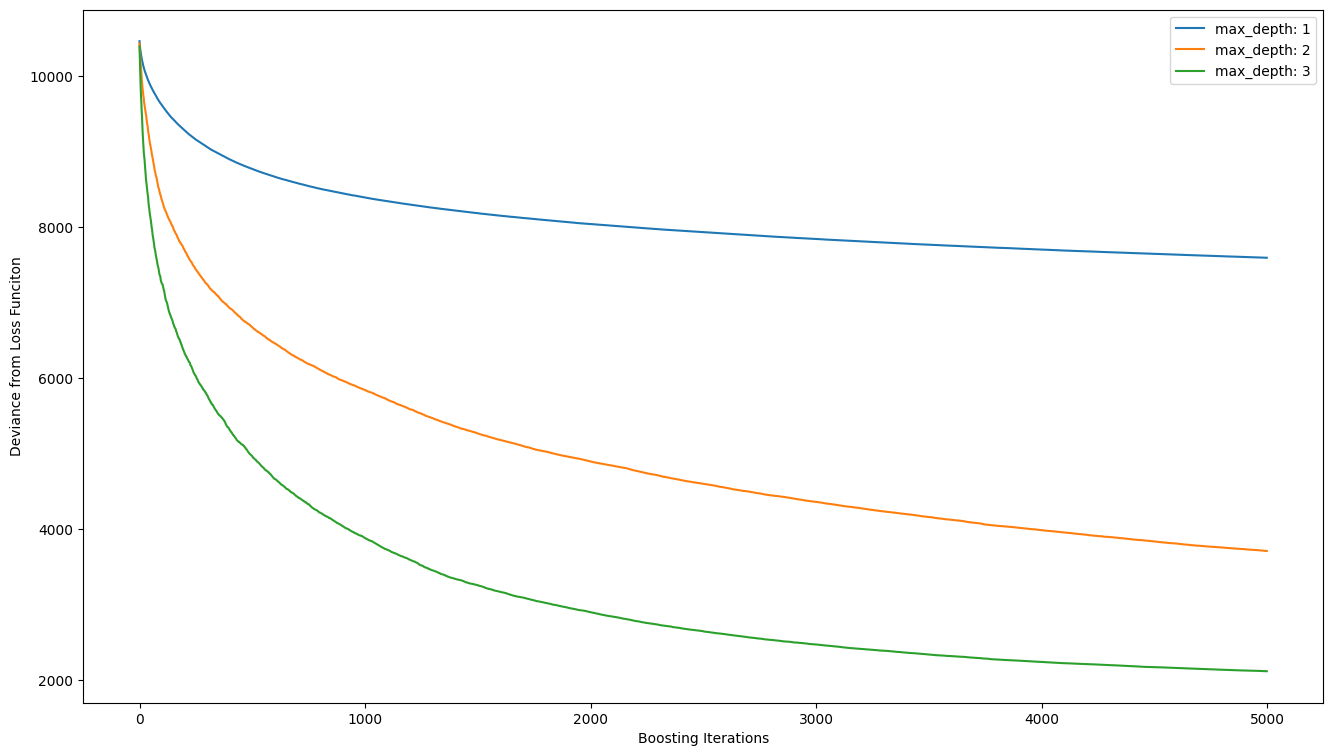

In [132]:
gbr_metrics = pandas.read_csv(GBR_GRAPH_METRICS_DATASET_PATH.name)
plot.figure(figsize=(16,9))
plot.xlabel('Boosting Iterations')
plot.ylabel('Deviance from Loss Funciton')
for depth in gbr_metrics["max_depth"].unique():
    performance = gbr_metrics.where(gbr_metrics["max_depth"] == depth).dropna()
    plot.plot(performance["iteration"], performance["training_loss"], label = "max_depth: "  + str(depth))
plot.legend(loc='upper right')
plot.savefig("GBR_deviation_vs_ilteration_for_multiple_max_depth.png")
plot.show()